# Linear Algebra Tutorial 4

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# pretty plotting & matrix printing
# (comment this out if it causes issues)
from jupyterthemes import jtplot
jtplot.style(context='talk', spines=False, gridlines='--')
np.set_printoptions(precision=3, suppress=True)

## Question 4

In [3]:
def qr_decompose(A):
    ''' Obtain the QR decomposition of A. '''
    cols = A.shape[1]
    Q, R = np.zeros(A.shape), np.zeros((cols, cols))
    for i in range(cols):
        a_i = A[:,i]
        for j in range(i):
            R[j,i] = Q[:,j].T @ a_i # matrix product is '@'
            a_i = a_i - Q[:,j] * R[j,i]
        R[i,i] = la.norm(a_i)
        Q[:,i] = a_i / R[i,i]
    return Q, R

### (4.a)

In [18]:
A = np.array([
    [0, 1],
    [1, 1],
    [0, 1]
])

Q, R = qr_decompose(A)
print(f'Our function:\nQ =\n{Q}\nR =\n{R}\n')

Q, R = la.qr(A, mode='economic') # this mode allows Q to be non-square
print(f'SciPy function:\nQ =\n{Q}\nR =\n{R}')

Our function:
Q =
[[0.    0.707]
 [1.    0.   ]
 [0.    0.707]]
R =
[[1.    1.   ]
 [0.    1.414]]

SciPy function:
Q =
[[ 0.     0.707]
 [-1.     0.   ]
 [-0.     0.707]]
R =
[[-1.    -1.   ]
 [ 0.     1.414]]


### (4.b)

In [19]:
A = np.array([
    [1, -1, 1],
    [1,  1, 2],
    [1,  0, 1]
])

Q, R = qr_decompose(A)
print(f'Our function:\nQ =\n{Q}\nR =\n{R}\n')

Q, R = la.qr(A)
print(f'SciPy function:\nQ =\n{Q}\nR =\n{R}')

Our function:
Q =
[[ 0.577 -0.707  0.408]
 [ 0.577  0.707  0.408]
 [ 0.577  0.    -0.816]]
R =
[[1.732 0.    2.309]
 [0.    1.414 0.707]
 [0.    0.    0.408]]

SciPy function:
Q =
[[-0.577  0.707 -0.408]
 [-0.577 -0.707 -0.408]
 [-0.577  0.     0.816]]
R =
[[-1.732  0.    -2.309]
 [ 0.    -1.414 -0.707]
 [ 0.     0.    -0.408]]


## Question 5

In [13]:
def plot_vectors(*vecs, width=3.5):
    ''' Plots given 2D column vectors at the origin. '''
    vs = np.concatenate([v.T for v in vecs]).T
    plt.quiver(*np.zeros(vs.shape), vs[0,:], vs[1,:], color=['b', 'r'],
               angles='xy', scale_units='xy', scale=1)
    plt.xlim(-width, width)
    plt.ylim(-width, width)
    plt.show()

# Rotation matrix for angle 3pi/4
theta = 3 * np.pi / 4
rot = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

### (5.a)

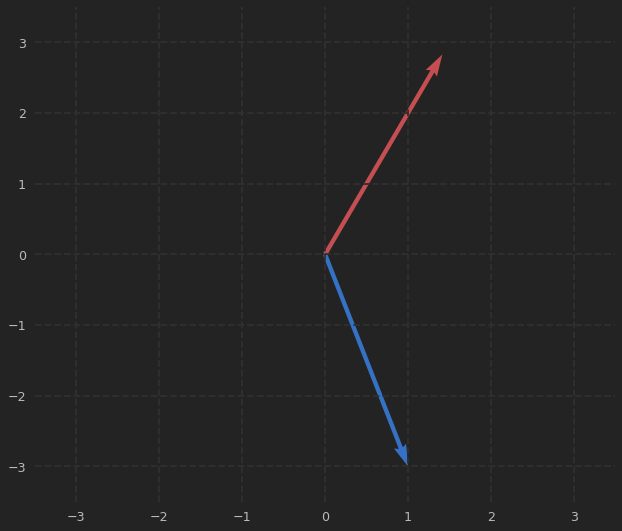

In [20]:
vec = np.array([[1, -3]]).T
plot_vectors(vec, rot @ vec) # blue, red, respectively

### (5.b)

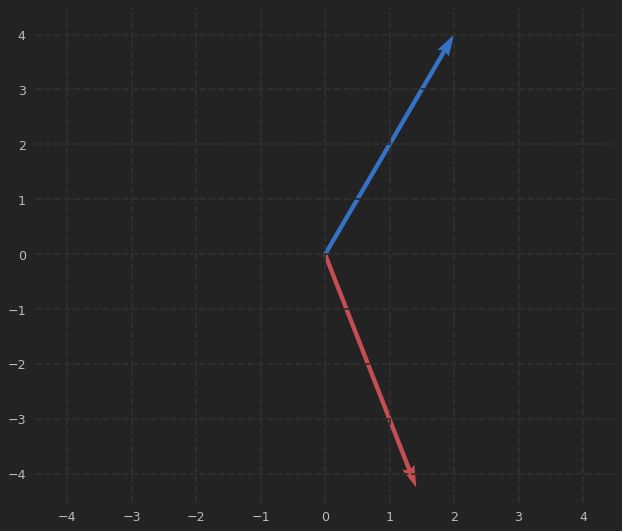

In [21]:
vec = np.array([[2, 4]]).T
plot_vectors(vec, rot.T @ vec, width=4.5) # blue, red, respectively